In [2]:
import numpy as np
import os
import cv2
import tensorflow 
import keras  
import glob 
import keras  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage import io 
import random 
from sklearn.metrics import classification_report, confusion_matrix  

import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
DATADIR = '/content/gdrive/MyDrive/archive/lego/'

# DATADIR = 'drive/My Drive/archive/lego'
CATEGORIES =["2357 Brick corner 1x2x2" , "3003 Brick 2x2" , "3004 Brick 1x2" , "3005 Brick 1x1" , "3022 Plate 2x2" , "3023 Plate 1x2" , "3024 Plate 1x1" , "3040 Roof Tile 1x2x45deg" , "3069 Flat Tile 1x2" , "3673 Peg 2M" , "3713 Bush for Cross Axle" , "3794 Plate 1X2 with 1 Knob" , "6632 Technic Lever 3M" , "11214 Bush 3M friction with Cross axle" , "18651 Cross Axle 2M with Snap friction" , "32123 half Bush"]

flat_data_arr=[] #input array
target_arr=[] #output array

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)   # create path to each class
    for img in os.listdir(path):    # iterate over each image per class
      try:
        img_array=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        IMG_SIZE = 50
        img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize to normalize data size
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(CATEGORIES.index(category))   # get the classification  (0 or a 1). 0=dog 1=cat
      except Exception as e:  # in the interest in keeping the output clean...
                pass
    print(f'loaded category:{category} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data(features)  independent values
y=df.iloc[:,-1] #output data(labels)  dependent values
      

loaded category:2357 Brick corner 1x2x2 successfully
loaded category:3003 Brick 2x2 successfully
loaded category:3004 Brick 1x2 successfully
loaded category:3005 Brick 1x1 successfully
loaded category:3022 Plate 2x2 successfully
loaded category:3023 Plate 1x2 successfully
loaded category:3024 Plate 1x1 successfully
loaded category:3040 Roof Tile 1x2x45deg successfully
loaded category:3069 Flat Tile 1x2 successfully
loaded category:3673 Peg 2M successfully
loaded category:3713 Bush for Cross Axle successfully
loaded category:3794 Plate 1X2 with 1 Knob successfully
loaded category:6632 Technic Lever 3M successfully
loaded category:11214 Bush 3M friction with Cross axle successfully
loaded category:18651 Cross Axle 2M with Snap friction successfully
loaded category:32123 half Bush successfully


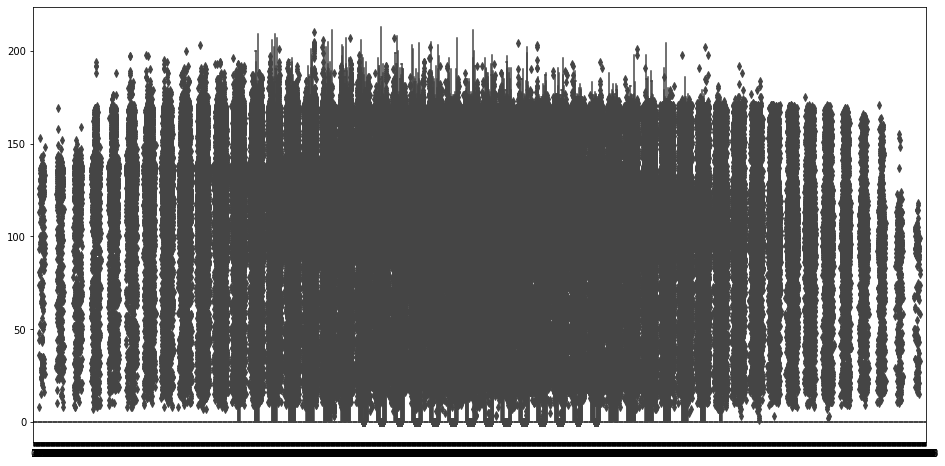

In [4]:
# Checking for Outliers in numerical data
import seaborn as sb
plt.figure(figsize=[16,8])
sb.boxplot(data = x)
plt.show()


In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=77,stratify=y)  #feature , labels 
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [17]:
model.fit(x_train,y_train)

GaussianNB()

In [18]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[12  9  3 ...  4 15  0]
The actual data is:
[12  9  3 ...  4 15  0]
The model is 71.00313479623824% accurate


In [19]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71       114
           1       0.95      0.90      0.92       120
           2       0.63      0.95      0.76       120
           3       0.99      0.97      0.98       120
           4       0.60      0.67      0.63       120
           5       0.37      0.37      0.37       120
           6       0.90      0.82      0.86       120
           7       0.48      0.21      0.29       120
           8       0.71      0.72      0.72       120
           9       0.71      0.91      0.80       120
          10       0.80      1.00      0.89       120
          11       0.42      0.64      0.51       120
          12       0.59      0.87      0.70       120
          13       0.80      0.47      0.60       120
          14       0.76      0.29      0.42       120
          15       1.00      1.00      1.00       120

    accuracy                           0.71      1914
   macro avg       0.73   

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred);
cm

array([[45,  2,  0,  0, 12,  0,  0,  5,  0,  0,  0,  0,  5,  5,  2,  0],
       [ 1, 71,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0, 75,  0,  0,  0,  0,  3,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 78,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0, 58,  0,  0,  0,  1,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  2,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 64,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  4,  0, 15, 18,  4,  0, 12,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0, 56,  1,  0,  6,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0, 74,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  3,  0, 55,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0, 70,  1,  0,  0],
       [ 0,  0,  7,  0, 11,  2,  2,  1,  3,  6,  1,

Text(69.0, 0.5, 'Truth or Actual Value')

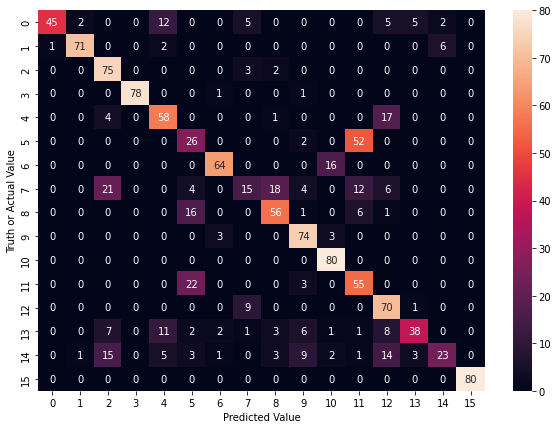

In [12]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')